## Twitter sentiment natural language processing analysis

### Stakeholder: A marketing team at a technology company

### Business Problem Statement: 
The marketing team wants to understand consumer sentiment towards Apple and Google products. They wish to explore  emotions, and sentiments expressed by users of Apple and Google products.They need insights that can inform marketing strategies, brand perception, and customer satisfaction initiatives for their target audience.


### The main business objective is:
- What is the overall sentiment towards Apple and Google products on Twitter 

### The specific business objectives to be answered include:
- Are there any recurring themes or topics associated with positive or negative sentiments towards these brands?
- Are there any notable differences in sentiment between Apple and Google products?


### Importing the necessary packages

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /home/pk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [156]:
df = pd.read_csv('tweet_product_company.csv', encoding='unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [157]:
df.shape

(9093, 3)

In [158]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [159]:
df.rename(columns ={'is_there_an_emotion_directed_at_a_brand_or_product' : 'sentiment', 'emotion_in_tweet_is_directed_at' : 'brand'}, inplace= True)

In [160]:
df['sentiment'] = df['sentiment'].replace('No emotion toward brand or product', 'neutral')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

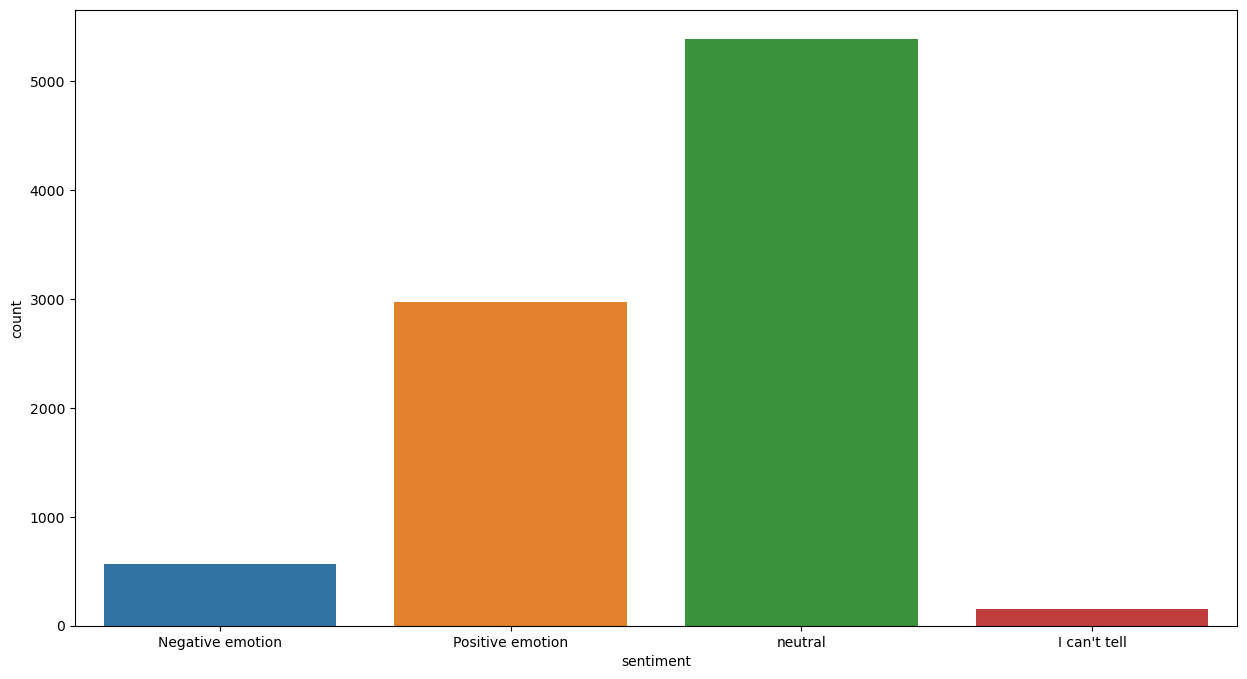

In [161]:
plt.figure(figsize = (15,8))
sns.countplot(x='sentiment', data= df)

In [162]:
df.isna().sum()

tweet_text       1
brand         5802
sentiment        0
dtype: int64

In [163]:
df['tweet_text'] = df['tweet_text'].str.lower()
df['brand'] = df['brand'].str.lower()

In [164]:
missing_brand_df = df[df['brand'].isna()]
missing_brand_df.head(10)

,tweet_text,brand,sentiment
5,@teachntech00 new ipad apps for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd,NaN,neutral
6,NaN,NaN,neutral
16,holler gram for ipad on the itunes app store - http://t.co/kfn3f5q (via @marc_is_ken) #sxsw,NaN,neutral
32,"attn: all #sxsw frineds, @mention register for #gdgtlive and see cobra iradar for android. {link}",NaN,neutral
33,anyone at #sxsw want to sell their old ipad?,NaN,neutral
34,anyone at #sxsw who bought the new ipad want to sell their older ipad to me?,NaN,neutral
35,"at #sxsw. oooh. rt @mention google to launch major new social network called circles, possibly today {link}",NaN,neutral
37,spin play - a new concept in music discovery for your ipad from @mention &amp; spin.com {link} #itunes #sxsw @mention,NaN,neutral
39,vatornews - google and apple force print media to evolve? {link} #sxsw,NaN,neutral
41,"hootsuite - hootsuite mobile for #sxsw ~ updates for iphone, blackberry &amp; android: whether youûªre getting friend... {link}",NaN,neutral


In [165]:
missing_brand_df.shape

(5802, 3)

In [166]:
df.brand.value_counts()

ipad                               946
apple                              661
ipad or iphone app                 470
google                             430
iphone                             297
other google product or service    293
android app                         81
android                             78
other apple product or service      35
Name: brand, dtype: int64

In [154]:
# Replace missing values with an empty string
# df['tweet_text'] = df['tweet_text'].fillna('')
df.dropna(subset=['tweet_text'], inplace=True)

# Define the keywords to search for
keywords = ['apple', 'ipad or iphone app', 'google', 'iphone', 'other google product or service', 'android app', 'android', 'other apple product or service', 'ipad', 'itunes']

# Search for keywords in 'tweet_text' column
filtered_df = missing_brand_df[missing_brand_df['tweet_text'].str.contains('|'.join(keywords), case=False)]

In [135]:
filtered_df.head(10)

,tweet_text,brand,sentiment
5,@teachntech00 new ipad apps for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd,NaN,neutral
16,holler gram for ipad on the itunes app store - http://t.co/kfn3f5q (via @marc_is_ken) #sxsw,NaN,neutral
32,"attn: all #sxsw frineds, @mention register for #gdgtlive and see cobra iradar for android. {link}",NaN,neutral
33,anyone at #sxsw want to sell their old ipad?,NaN,neutral
34,anyone at #sxsw who bought the new ipad want to sell their older ipad to me?,NaN,neutral
35,"at #sxsw. oooh. rt @mention google to launch major new social network called circles, possibly today {link}",NaN,neutral
37,spin play - a new concept in music discovery for your ipad from @mention &amp; spin.com {link} #itunes #sxsw @mention,NaN,neutral
39,vatornews - google and apple force print media to evolve? {link} #sxsw,NaN,neutral
41,"hootsuite - hootsuite mobile for #sxsw ~ updates for iphone, blackberry &amp; android: whether youûªre getting friend... {link}",NaN,neutral
42,hey #sxsw - how long do you think it takes us to make an iphone case? answer @mention using #zazzlesxsw and weûªll make you one!,NaN,neutral


In [136]:
filtered_df.shape

(5095, 3)

In [137]:
# Assign the keyword value to the 'brand' column
filtered_df['brand'] = filtered_df['tweet_text'].apply(lambda x: next((word for word in keywords if word in x), None))

/tmp/ipykernel_6642/2583434774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['brand'] = filtered_df['tweet_text'].apply(lambda x: next((word for word in keywords if word in x), None))


In [138]:
filtered_df.head(10)

,tweet_text,brand,sentiment
5,@teachntech00 new ipad apps for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd,ipad,neutral
16,holler gram for ipad on the itunes app store - http://t.co/kfn3f5q (via @marc_is_ken) #sxsw,ipad,neutral
32,"attn: all #sxsw frineds, @mention register for #gdgtlive and see cobra iradar for android. {link}",android,neutral
33,anyone at #sxsw want to sell their old ipad?,ipad,neutral
34,anyone at #sxsw who bought the new ipad want to sell their older ipad to me?,ipad,neutral
35,"at #sxsw. oooh. rt @mention google to launch major new social network called circles, possibly today {link}",google,neutral
37,spin play - a new concept in music discovery for your ipad from @mention &amp; spin.com {link} #itunes #sxsw @mention,ipad,neutral
39,vatornews - google and apple force print media to evolve? {link} #sxsw,apple,neutral
41,"hootsuite - hootsuite mobile for #sxsw ~ updates for iphone, blackberry &amp; android: whether youûªre getting friend... {link}",iphone,neutral
42,hey #sxsw - how long do you think it takes us to make an iphone case? answer @mention using #zazzlesxsw and weûªll make you one!,iphone,neutral


In [139]:
filtered_df.shape

(5095, 3)

In [140]:
filtered_df.isna().sum()

tweet_text    0
brand         0
sentiment     0
dtype: int64

- df-doesn`t have any missing values= 9093
- missing_brand_df= 5802
- filtered_df = 5095
- result_df = 707
- concatenated_df = 8386


In [145]:
# Convert the relevant columns to sets
missing_brand_set = set(missing_brand_df.index)
filtered_set = set(filtered_df.index)

# Find the rows in missing_brand_df not in filtered_df using set difference
result_set = missing_brand_set - filtered_set

# Create the resulting DataFrame
result_df = df.loc[result_set]

# Display the resulting DataFrame
pd.set_option('display.max_colwidth', None)
result_df.tail(20)


/tmp/ipykernel_6642/543324589.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  result_df = df.loc[result_set]


,tweet_text,brand,sentiment
6095,"rt @mention if you are attending #sxsw, please bring your old mobile phones for the hope phones project {link} @mention",NaN,neutral
8142,#sxsw #sxswi @mention is holding a secret show ft. mister heavenly+michael cera at 5. free beer at 4. location: {link},NaN,neutral
8144,day 4: sxswi wrap-up with tracy shea @mention and rick and bobby liebling @mention - {link} #sxsw #hotsheet,NaN,neutral
2007,"lonely planet has made the austin guide free for #sxsw grab it, you never know when you will need it. {link}",NaN,neutral
4055,no umbrella when you have &quot;the list&quot; via @mention ÷¼ are you all set? ÷_ {link} ÷_ #edchat #musedchat #sxsw #sxswi #newtwitter,NaN,neutral
8156,"#wahoos #sxsw party free beers, tacos, and ritas thurs.\n{link}",NaN,neutral
6110,rt @mention if you're at #sxsw : meet us at fado. we will give you wristbands that magically lead to beer. come say hi! {link},NaN,neutral
2016,@mention announces #windowsphone app today #sxsw {link} #wp7,NaN,neutral
4065,"24 hours later, we retreat back to our hotel, bushwhacked. ringo deathstarr'd, never seen so many effects pedals #sxsw {link}",NaN,neutral
4066,grab the latest @mention before #sxsw! {link},NaN,neutral


In [142]:
result_df.shape

(707, 3)

In [144]:
707/9093

0.07775211701308699

In [151]:
df_brand_present = df[df['brand'].notna()]
# Assuming 'df_brand_present' and 'filtered_df' are your DataFrames
concatenated_df = pd.concat([df_brand_present, filtered_df], ignore_index=True)

# Display the concatenated DataFrame
concatenated_df.head(10)


,tweet_text,brand,sentiment
0,".@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead! i need to upgrade. plugin stations at #sxsw.",iphone,Negative emotion
1,"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw",ipad or iphone app,Positive emotion
2,@swonderlin can not wait for #ipad 2 also. they should sale them down at #sxsw.,ipad,Positive emotion
3,@sxsw i hope this year's festival isn't as crashy as this year's iphone app. #sxsw,ipad or iphone app,Negative emotion
4,"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)",google,Positive emotion
5,"#sxsw is just starting, #ctia is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",android,Positive emotion
6,beautifully smart and simple idea rt @madebymany @thenextweb wrote about our #hollergram ipad app for #sxsw! http://bit.ly/ieavob,ipad or iphone app,Positive emotion
7,counting down the days to #sxsw plus strong canadian dollar means stock up on apple gear,apple,Positive emotion
8,excited to meet the @samsungmobileus at #sxsw so i can show them my sprint galaxy s still running android 2.1. #fail,android,Positive emotion
9,find &amp; start impromptu parties at #sxsw with @hurricaneparty http://bit.ly/gvlrin i can't wait til the android app comes out.,android app,Positive emotion


In [167]:
concatenated_df.shape

(8386, 3)

In [168]:
concatenated_df.isna().sum()

tweet_text    0
brand         0
sentiment     0
dtype: int64

### Dropping duplicates

In [178]:
duplicates_df = concatenated_df[concatenated_df.duplicated()]

In [182]:
duplicates_df.head(20)

,tweet_text,brand,sentiment
197,"before it even begins, apple wins #sxsw {link}",apple,Positive emotion
198,"before it even begins, apple wins #sxsw {link}",apple,Positive emotion
272,"if you're in a room full of people w/good wi-fi at #sxsw run #frostwire on your android {link} share pics, apps, vids w/others",android app,Positive emotion
970,counting down the days to #sxsw plus strong canadian dollar means stock up on apple gear,apple,Positive emotion
1445,win free ipad 2 from webdoc.com #sxsw rt,ipad,Positive emotion
1499,really enjoying the changes in gowalla 3.0 for android! looking forward to seeing what else they &amp; foursquare have up their sleeves at #sxsw,android app,Positive emotion
1507,"#sxsw is just starting, #ctia is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",android,Positive emotion
1901,"oh. my. god. the #sxsw app for ipad is pure, unadulterated awesome. it's easier to browse events on ipad than on the website!!!",ipad or iphone app,Positive emotion
2322,rt @mention marissa mayer: google will connect the digital &amp; physical worlds through mobile - {link} #sxsw,google,Positive emotion
2323,rt @mention marissa mayer: google will connect the digital &amp; physical worlds through mobile - {link} #sxsw,google,Positive emotion


In [183]:
concatenated_df.drop_duplicates(inplace=True)

In [184]:
concatenated_df.shape

(8347, 3)